In [1]:
from datetime import datetime, timedelta
from weight_statistics_class import weight_updater
import pandas as pd

%load_ext autoreload
%autoreload 2


In [2]:
start_date = datetime(2023,8,7)

weight_df = weight_updater(start_date)
#weight_df.fill_values()
weight_df.load_external_df("current_weiht_mum.json")

In [3]:
df = weight_df.return_df()


In [4]:
df

,weight,calories
2023-08-07,121.00,NaN
2023-08-08,119.90,1200.0
2023-08-09,119.00,1207.0
2023-08-10,118.20,1142.0
2023-08-11,118.40,1349.0
2023-08-12,NaN,NaN
2023-08-13,117.40,NaN
2023-08-14,117.30,NaN
2023-08-15,116.50,1400.0
2023-08-16,NaN,NaN


In [5]:
df.keys()

Index(['weight', 'calories'], dtype='object')

In [6]:
mean, median = weight_df.calculate_weekly_stats()

In [7]:
mean

,weight,calories
2023-08-13,118.983333,1224.5
2023-08-20,116.400000,1382.0
2023-08-27,115.287500,1384.2


In [8]:
median

,weight,calories
2023-08-13,118.700,1203.5
2023-08-20,116.500,1400.0
2023-08-27,116.125,1400.0


In [9]:
df.to_json("current_weiht_mum.json")

In [21]:
weight_df.interpolate_missing_values(method = "time")
df_inter = weight_df.return_df()
df_inter

,weight,calories
2023-08-07,121.000,NaN
2023-08-08,119.900,1200.00
2023-08-09,119.000,1207.00
2023-08-10,118.200,1142.00
2023-08-11,118.400,1349.00
2023-08-12,117.900,1361.75
2023-08-13,117.400,1374.50
2023-08-14,117.300,1387.25
2023-08-15,116.500,1400.00
2023-08-16,115.950,1350.00


In [28]:
weight_df.fill_nan_values(method = "bfill")

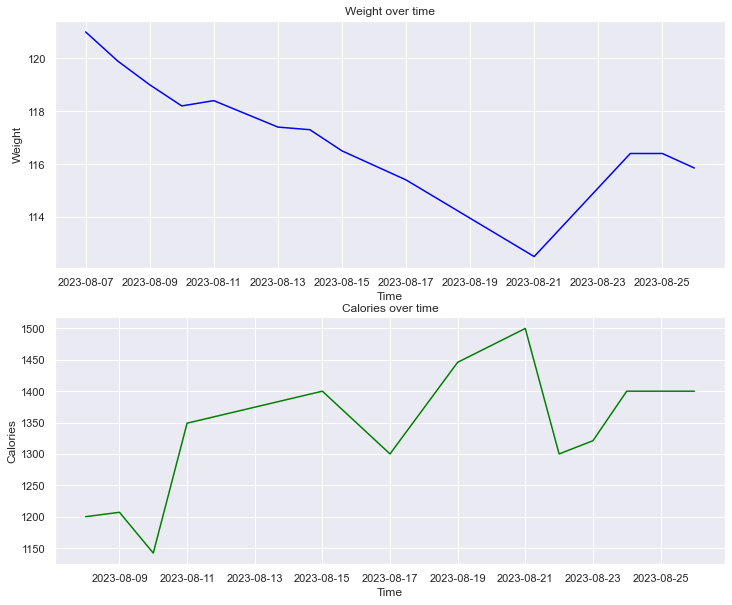

In [19]:
weight_df.plot_weight_calories()

In [ ]:
wei

In [31]:
weight_df.grid_search_for_forecasting()

            weight  calories
2023-08-07   121.0    1200.0
2023-08-08   119.9    1200.0
2023-08-09   119.0    1207.0
2023-08-10   118.2    1142.0
2023-08-11   118.4    1349.0
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -19.941
Date:                Sat, 26 Aug 2023   AIC                             49.882
Time:                        15:46:13   BIC                             54.861
Sample:                    08-07-2023   HQIC                            50.854
                         - 08-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.4539      8.360    

In [14]:
df_inter = weight_df.return_df()

In [17]:
df_inter

,weight,calories
2023-08-07,121.000,NaN
2023-08-08,119.900,1200.00
2023-08-09,119.000,1207.00
2023-08-10,118.200,1142.00
2023-08-11,118.400,1349.00
2023-08-12,117.900,1361.75
2023-08-13,117.400,1374.50
2023-08-14,117.300,1387.25
2023-08-15,116.500,1400.00
2023-08-16,115.950,1350.00


In [45]:
fc_calores = [1200, 1350, 1600]
forecast_length=4
x = {}    
for calorie in fc_calores:
    clist = []
    for i in range(forecast_length):
        clist.append(calorie)
    x[f"{calorie}"] = clist
    
print(x)



{'1200': [1200, 1200, 1200, 1200], '1350': [1350, 1350, 1350, 1350], '1600': [1600, 1600, 1600, 1600]}


In [48]:
forecast_df = weight_df.forecast_weight_based_on_calories(forecast_length=forecast_length, x=x)

forecast_df

                            calories
2023-08-27 16:24:28.424370      1200
2023-08-28 16:24:28.424370      1200
2023-08-29 16:24:28.424370      1200
2023-08-30 16:24:28.424370      1200
2023-08-27    115.502693
2023-08-28    115.273763
2023-08-29    115.124303
2023-08-30    115.025421
Freq: D, Name: predicted_mean, dtype: float64
                            calories
2023-08-27 16:24:28.442919      1350
2023-08-28 16:24:28.442919      1350
2023-08-29 16:24:28.442919      1350
2023-08-30 16:24:28.442919      1350
2023-08-27    115.497824
2023-08-28    115.268894
2023-08-29    115.119435
2023-08-30    115.020552
Freq: D, Name: predicted_mean, dtype: float64
                            calories
2023-08-27 16:24:28.454409      1600
2023-08-28 16:24:28.454409      1600
2023-08-29 16:24:28.454409      1600
2023-08-30 16:24:28.454409      1600
2023-08-27    115.489710
2023-08-28    115.260781
2023-08-29    115.111321
2023-08-30    115.012439
Freq: D, Name: predicted_mean, dtype: float64


/Users/arianbajrami/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/arianbajrami/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/arianbajrami/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,1200,1350,1600,"(1200, mean)","(1200, low)","(1200, up)","(1350, mean)","(1350, low)","(1350, up)","(1600, mean)","(1600, low)","(1600, up)"
2023-08-27,NaN,NaN,NaN,115.502693,114.301170,116.704215,115.497824,114.296302,116.699347,115.489710,114.288188,116.691233
2023-08-28,NaN,NaN,NaN,115.273763,112.969594,117.577932,115.268894,112.964726,117.573063,115.260781,112.956612,117.564949
2023-08-29,NaN,NaN,NaN,115.124303,111.759133,118.489473,115.119435,111.754264,118.484605,115.111321,111.746151,118.476491
2023-08-30,NaN,NaN,NaN,115.025421,110.671856,119.378986,115.020552,110.666988,119.374117,115.012439,110.658874,119.366004


In [15]:
df["calories"]

2023-08-07       NaN
2023-08-08    1200.0
2023-08-09    1207.0
2023-08-10    1142.0
2023-08-11    1349.0
2023-08-12       NaN
2023-08-13       NaN
2023-08-14       NaN
2023-08-15    1400.0
2023-08-16       NaN
2023-08-17    1300.0
2023-08-18       NaN
2023-08-19    1446.0
2023-08-20       NaN
2023-08-21    1500.0
2023-08-22    1300.0
2023-08-23    1321.0
2023-08-24    1400.0
2023-08-25    1400.0
2023-08-26       NaN
Name: calories, dtype: float64

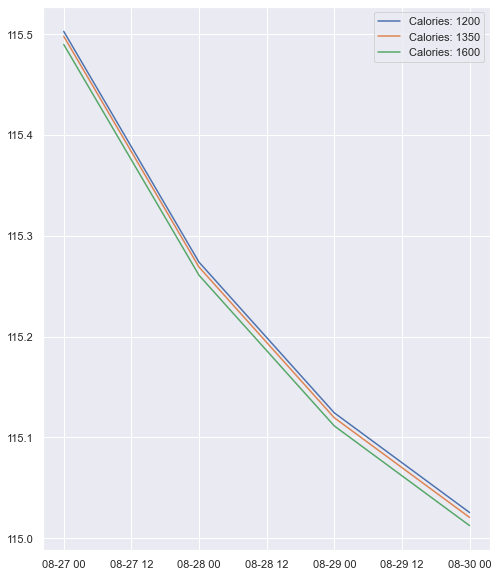

In [58]:
weight_df.plot_forecast()